# PyCity School District Performance Analysis
## Abstract
Standardised tests are used to measure the performance of schools. Math and Reading are two components of these standardised exams. In this study, the contributions of three factors (school type, budget per student, and school size) were explored in terms of their associations with rates of passing Math and Reading tests, and scores from these tests.

There were three key takeaways generated from the performance analysis. First, the number of students (school size) explained 67–71% of the variance in the performance indicators. Classifying the schools into size categories showed the contrasts even more clearly: small and medium schools performed better than large schools. Second, there was a strong linear relationship between school size and budget. However, an increase in either budget or budget per student did not seem to be linked with improved school performance. Third, charter school appeared to have performed much better than district schools in the standardised tests. 

Before making actionable insights based from these takeaways, it is important to take note that the variables that contribute to school performance were largely incomplete. There was no information on school facilities and on student-teacher ratios, for example.


## Introduction

The PyCity School District is composed of 15 schools that could be classified as either "charter" or "district" schools. There was a total of 39,170 students in this district, from 9th to 12th grade (secondary school; Corsi-Bunker 2018), who underwent the standardised exam. The exam is composed of two sections, Mathematics and Reading. The objective of this study was to identify trends from the students' performances and to generate insights that could lead towards strategic decisions at the district level.

## Methods
The scores of each examinee were encoded into two .csv files. The data included school names, types, budgets, and sizes (schools_complete.csv); as well student names, genders, and scores in the two components of the standardised exam (students_complete.csv). Python (version 3.6) modules Pandas (McKinney 2010) and NumPy (Oliphant 2006) were used to analyse the data. SciPy and MatPlotLib modules (SciPy Community 2015; https://matplotlib.org/) were used to compare means and to visualise the data as plots, respectively.

The study looked at the trends based on school type, budget, and size. Student gender was not considered as a factor in student scores and in school performance. Student-teacher ratios were not included in the data included.

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

The .csv files were merged prior to data analyses. Dataframe groupby objects were then generated and used to calculate various statistics.

In [2]:
# Data sources
school_data_to_load = "schools_complete.csv"
student_data_to_load = "students_complete.csv"

# Read School and Student Data File and store into Pandas Data Frames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

# Combine the data into a single dataset
school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])

## Results
### District Overview
The data indicates that the PyCity School District reported a budget of USD 24,649,428.00. Only 65% of the students passed both Math and Reading Exams (overall passing; Betts et al. 2012). The Welch t-test suggests that there was no significant difference in the average scores for Math and for Reading. However, the passing rate for Reading was significantly higher than for Math.

In [3]:
# group the data by school
school_grped = school_data_complete.groupby("school_name")

# descriptive statistics
no_schools = len(school_grped) # number of schools in the district
no_students = school_grped["school_name"].count().sum() # number of students in the district
tot_dist_sch_budget = round(school_grped["budget"].mean().sum(),2) # total education budget of the district
dist_ave_math_score = round((school_grped["math_score"].sum().sum() / no_students),2) # district average math score
dist_ave_rdg_score = round((school_grped["reading_score"].sum().sum() / no_students),2) # district average reading score

# proportion of students who passed?
pct_math_passers = round(((len(school_data_complete.loc[school_data_complete["math_score"] >= 70]) / no_students) * 100),2)
pct_rdg_passers = round(((len(school_data_complete.loc[school_data_complete["reading_score"] >= 70]) / no_students) * 100),2)

# number of students who passed both math and reading tests (overall passing rate)
both_passers = len(school_data_complete.loc[(school_data_complete["reading_score"] >= 70) & 
                                            (school_data_complete["math_score"] >= 70)])
pct_both_passers = round(((both_passers / no_students) * 100),2)

# summary for the district
summary_district = pd.DataFrame({"Number of schools": [no_schools],
                                 "Number of students": "{:,}".format(no_students),
                                 "District education budget (USD)": "{:,.2f}".format(tot_dist_sch_budget),
                                 "Average Math Score (%)": [dist_ave_math_score],
                                 "Average Reading Score (%)": [dist_ave_rdg_score],
                                 "Proportion of Math Passers (%)": [pct_math_passers],
                                 "Proportion of Reading Passers (%)": [pct_rdg_passers],
                                 "Overall Passing Rate (%)": [pct_both_passers]
                                })
summary_district

,Number of schools,Number of students,District education budget (USD),Average Math Score (%),Average Reading Score (%),Proportion of Math Passers (%),Proportion of Reading Passers (%),Overall Passing Rate (%)
0,15,"39,170","24,649,428.00",78.99,81.88,74.98,85.81,65.17


In [4]:
# Comparing results using Welch test
score_math_v_rdg = stats.ttest_ind(a = school_data_complete["math_score"], 
                                   b = school_data_complete["reading_score"], 
                                   equal_var=False)

rate_math_v_rdg = stats.ttest_ind(a = school_data_complete["math_score"] >= 70, 
                                  b = school_data_complete["reading_score"] >= 70, 
                                   equal_var=False)

print("ave scores: " + str(score_math_v_rdg), "\nproportion of passers: " + str(rate_math_v_rdg))

ave scores: Ttest_indResult(statistic=-35.75195003868989, pvalue=1.2806038540891453e-277) 
proportion of passers: Ttest_indResult(statistic=-38.51488279421802, pvalue=0.0)


### School Summary
Within the PyCity School District, the secondary student population ranged from 427 to 4976. Holden High School reported the lowest budget while Bailey High School had the highest budget. The budget per student, on the other hand, ranged from USD 578 to USD 655 within the district. The data suggests that the schools were doing fairly well because the average scores for Math and for Reading were above 70% across all schools in the district. 

To calculate each school's passing rate per subject, the number of students who scored 70% or more was determined and then divided by the total number of students per school. Results indicate that passing rates for Math and for Reading were above 50%. To get the overall passing rates per school, the number of students who scored 70% or better in both Math and Reading was calculated and divided by the total number of students. Results show that some of the schools did not perform as well as the others.

In [5]:
# group the data by school name and type
school_grped2 = school_data_complete.groupby(["school_name","type"]) # group schools by name

# descriptive statistics
no_students_per_sch = school_grped2["school_name"].count() # number of students per school
tot_sch_budget = school_grped2["budget"].mean() # total education budget per school
per_student_budget = round((tot_sch_budget / no_students_per_sch),2)
sch_ave_math_score = round((school_grped2["math_score"].sum() / no_students_per_sch),2) # school average math score
sch_ave_rdg_score = round((school_grped2["reading_score"].sum() / no_students_per_sch),2) # school average reading score

sch_math_passers = school_grped2["math_score"].apply(lambda x: x[x >=70].count()) # number of math passers per school
pct_sch_math_passers = round(((sch_math_passers * 100) / no_students_per_sch),2) # proportion of math passers per school

sch_rdg_passers = school_grped2["reading_score"].apply(lambda x: x[x >=70].count()) # number of reading passers per school
pct_sch_rdg_passers = round(((sch_rdg_passers * 100) / no_students_per_sch),2) # proportion of reading passers per school

# filter raw data for students who passed both math and reading tests
sch_passers = school_data_complete.loc[(school_data_complete["math_score"] >= 70) & (school_data_complete["reading_score"] >= 70)]
sch_passers_grped = sch_passers.groupby(["school_name"])
pct_sch_overall_passers = round(((sch_passers_grped["student_name"].count() / no_students_per_sch) * 100),2)

# summary per school
summary_school = pd.DataFrame({"Number of students": no_students_per_sch,
                               "Budget (USD)": "{:,}".format(tot_dist_sch_budget),
                               "Budget per Student (USD)": per_student_budget,
                               "Average Math Score (%)": sch_ave_math_score,
                               "Average Reading Score (%)": sch_ave_rdg_score,
                               "Proportion of Math Passers (%)": pct_sch_math_passers,
                               "Proportion of Reading Passers (%)": pct_sch_rdg_passers,
                               "Proportion of Overall Passers (%)": pct_sch_overall_passers
                                })
summary_school

,,Number of students,Budget (USD),Budget per Student (USD),Average Math Score (%),Average Reading Score (%),Proportion of Math Passers (%),Proportion of Reading Passers (%),Proportion of Overall Passers (%)
school_name,type,,,,,,,,
Bailey High School,District,4976,"24,649,428",628.0,77.05,81.03,66.68,81.93,54.64
Cabrera High School,Charter,1858,"24,649,428",582.0,83.06,83.98,94.13,97.04,91.33
Figueroa High School,District,2949,"24,649,428",639.0,76.71,81.16,65.99,80.74,53.20
Ford High School,District,2739,"24,649,428",644.0,77.10,80.75,68.31,79.30,54.29
Griffin High School,Charter,1468,"24,649,428",625.0,83.35,83.82,93.39,97.14,90.60
Hernandez High School,District,4635,"24,649,428",652.0,77.29,80.93,66.75,80.86,53.53
Holden High School,Charter,427,"24,649,428",581.0,83.80,83.81,92.51,96.25,89.23
Huang High School,District,2917,"24,649,428",655.0,76.63,81.18,65.68,81.32,53.51
Johnson High School,District,4761,"24,649,428",650.0,77.07,80.97,66.06,81.22,53.54


Plotting the overall passing rate of each school against the school's budget suggests that there are two clusters in terms of performance: a group that reported high budgets but had lower overall passing scores; and another group which had higher scores but relatively lower budgets.

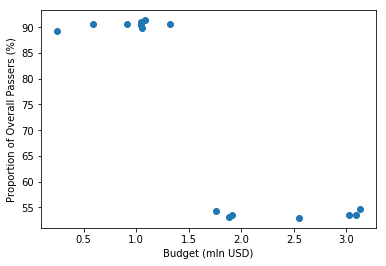

In [6]:
# scatterplot of budget vs overall passing rate
x = tot_sch_budget / 1000000
y = pct_sch_overall_passers
plt.scatter(x, y)
plt.xlabel("Budget (mln USD)")
plt.ylabel("Proportion of Overall Passers (%)")
plt.savefig("budget_overall_passing_rate.png")

On the other hand, plotting school size by overall passing rate indicates that there are two groups as well: a group of schools that had high passing rates and smaller sizes; and another group of schools with low passing rates but higher student volumes. This is an unexpected result because theoretically, the more money invested per child, the higher should his/her probability of passing a standardised exam. Perhaps, this finding is influenced by characteristics of the schools within the district.

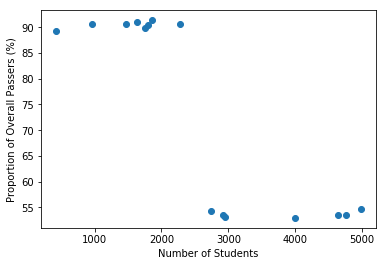

In [7]:
# scatterplot of school size vs overall passing rate
x = no_students_per_sch
y = pct_sch_overall_passers
plt.scatter(x, y)
plt.xlabel("Number of Students")
plt.ylabel("Proportion of Overall Passers (%)")
plt.savefig("size_overall_passing_rate.png")

It was determined that as the number of students increased, the budget also increased. But the budget per student was not correlated as strongly with the school budget.

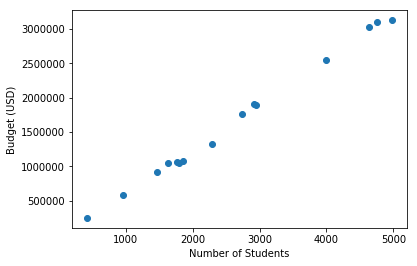

In [8]:
# scatterplot of school size vs budget
x = no_students_per_sch
y = tot_sch_budget
plt.scatter(x, y)
plt.xlabel("Number of Students")
plt.ylabel("Budget (USD)")
plt.savefig("budget_v_size.png")

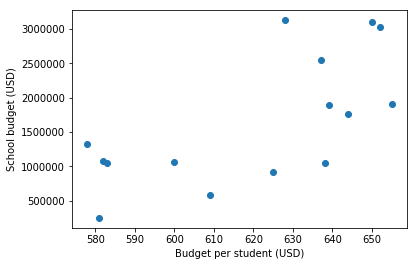

In [9]:
# scatterplot of student budget vs total school budget
x = per_student_budget
y = tot_sch_budget
plt.scatter(x, y)
plt.xlabel("Budget per student (USD)")
plt.ylabel("School budget (USD)")
plt.savefig("budget_v_stdbudget.png")

### Top Performing Schools (By Passing Rate)
All the top five schools, by overall passing rate, were charter schools. The number of students in these schools tended to be lower than 2500. These schools were allotting USD 578–638 per student. The overall passing rates did not dip lower than 90%.

In [10]:
# sort the schools by overall passing rate
sch_passers_sorted = summary_school.sort_values("Proportion of Overall Passers (%)", ascending = False)

In [11]:
# display top five schools
sch_passers_sorted.head()

,,Number of students,Budget (USD),Budget per Student (USD),Average Math Score (%),Average Reading Score (%),Proportion of Math Passers (%),Proportion of Reading Passers (%),Proportion of Overall Passers (%)
school_name,type,,,,,,,,
Cabrera High School,Charter,1858,"24,649,428",582.0,83.06,83.98,94.13,97.04,91.33
Thomas High School,Charter,1635,"24,649,428",638.0,83.42,83.85,93.27,97.31,90.95
Griffin High School,Charter,1468,"24,649,428",625.0,83.35,83.82,93.39,97.14,90.60
Wilson High School,Charter,2283,"24,649,428",578.0,83.27,83.99,93.87,96.54,90.58
Pena High School,Charter,962,"24,649,428",609.0,83.84,84.04,94.59,95.95,90.54


### Bottom Performing Schools (By Passing Rate)
In contrast, the schools which performed the worst in the district were all district schools with student populations exceeding 2900. These schools allotted slightly higher budgets per student (USD 637–655) than the top performers. Although the average Math and Reading scores were above 70%, the overall passing rate only hovered above 50%. 

In [12]:
# display bottom five schools
sch_passers_sorted.tail()

,,Number of students,Budget (USD),Budget per Student (USD),Average Math Score (%),Average Reading Score (%),Proportion of Math Passers (%),Proportion of Reading Passers (%),Proportion of Overall Passers (%)
school_name,type,,,,,,,,
Johnson High School,District,4761,"24,649,428",650.0,77.07,80.97,66.06,81.22,53.54
Hernandez High School,District,4635,"24,649,428",652.0,77.29,80.93,66.75,80.86,53.53
Huang High School,District,2917,"24,649,428",655.0,76.63,81.18,65.68,81.32,53.51
Figueroa High School,District,2949,"24,649,428",639.0,76.71,81.16,65.99,80.74,53.20
Rodriguez High School,District,3999,"24,649,428",637.0,76.84,80.74,66.37,80.22,52.99


### Math Scores by Grade
The data showed that the scores, across grades, did not change too much per school. The range and the median were relatively uniform across grades. These suggest that the level of difficulty of the Math exam remained constant across grades. The box plots suggest that the distribution is skewed. There are more students who scored higher than those who scored lower.

In [13]:
# filter the data by grade
grade_09 = school_data_complete.loc[school_data_complete["grade"] == "9th"]
grade_10 = school_data_complete.loc[school_data_complete["grade"] == "10th"]
grade_11 = school_data_complete.loc[school_data_complete["grade"] == "11th"]
grade_12 = school_data_complete.loc[school_data_complete["grade"] == "12th"]

# get average score for math for each grade by school
math_09_ave = round((grade_09.groupby("school_name")["math_score"].mean()),2)
math_10_ave = round((grade_10.groupby("school_name")["math_score"].mean()),2)
math_11_ave = round((grade_11.groupby("school_name")["math_score"].mean()),2)
math_12_ave = round((grade_12.groupby("school_name")["math_score"].mean()),2)

# merge series to dataframe
math_df = pd.DataFrame({"9th Grade Math Score (%)": math_09_ave, "10th Grade Math Score (%)": math_10_ave, "11th Grade Math Score (%)": math_11_ave, "12th Grade Math Score (%)": math_12_ave})                                 
math_df

,9th Grade Math Score (%),10th Grade Math Score (%),11th Grade Math Score (%),12th Grade Math Score (%)
school_name,,,,
Bailey High School,77.08,77.00,77.52,76.49
Cabrera High School,83.09,83.15,82.77,83.28
Figueroa High School,76.40,76.54,76.88,77.15
Ford High School,77.36,77.67,76.92,76.18
Griffin High School,82.04,84.23,83.84,83.36
Hernandez High School,77.44,77.34,77.14,77.19
Holden High School,83.79,83.43,85.00,82.86
Huang High School,77.03,75.91,76.45,77.23
Johnson High School,77.19,76.69,77.49,76.86


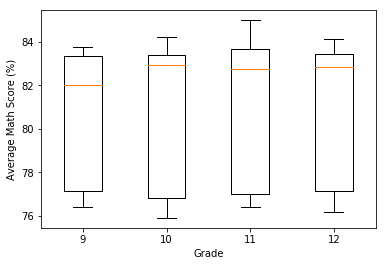

In [14]:
# plot the Math average scores by grade
fig, ax = plt.subplots()
plt.boxplot([math_09_ave, math_10_ave, math_11_ave, math_12_ave])
plt.xlabel("Grade")
plt.ylabel("Average Math Score (%)")
ax.set_xticklabels(labels =[9,10,11,12])
plt.savefig("Images/math_v_grade.png")
plt.show()

### Reading Score by Grade 
The range of average scores for the Reading exam was shorter than that of the Math exam, which suggests that the students had similar proficiencies in Reading across grades. The Reading median score was lower in the 12th Grade than in the other grades, indicating that the 12th Grade exam was more difficult than the exams in the other grades. There are several possible reasons for this. A closer look at the 12th Grade Reading curriculum and exam contents may be key to explaining the students' performance.

In [15]:
# get average score for reading for each grade by school
rdg_09_ave = round((grade_09.groupby("school_name")["reading_score"].mean()),2)
rdg_10_ave = round((grade_10.groupby("school_name")["reading_score"].mean()),2)
rdg_11_ave = round((grade_11.groupby("school_name")["reading_score"].mean()),2)
rdg_12_ave = round((grade_12.groupby("school_name")["reading_score"].mean()),2)

# merge series to dataframe
rdg_df = pd.DataFrame({"9th Grade Reading Score (%)": rdg_09_ave, "10th Grade Reading Score (%)": rdg_10_ave, "11th Grade Reading Score (%)": rdg_11_ave, "12th Grade Reading Score (%)": rdg_12_ave})                                 
rdg_df

,9th Grade Reading Score (%),10th Grade Reading Score (%),11th Grade Reading Score (%),12th Grade Reading Score (%)
school_name,,,,
Bailey High School,81.30,80.91,80.95,80.91
Cabrera High School,83.68,84.25,83.79,84.29
Figueroa High School,81.20,81.41,80.64,81.38
Ford High School,80.63,81.26,80.40,80.66
Griffin High School,83.37,83.71,84.29,84.01
Hernandez High School,80.87,80.66,81.40,80.86
Holden High School,83.68,83.32,83.82,84.70
Huang High School,81.29,81.51,81.42,80.31
Johnson High School,81.26,80.77,80.62,81.23


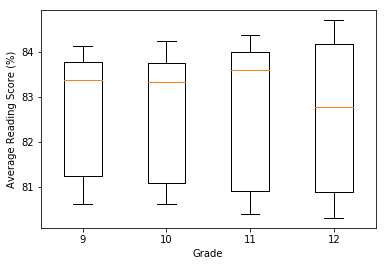

In [16]:
# plot the Reading average scores by grade
fig, ax = plt.subplots()
plt.boxplot([rdg_09_ave, rdg_10_ave, rdg_11_ave, rdg_12_ave])
plt.xlabel("Grade")
plt.ylabel("Average Reading Score (%)")
ax.set_xticklabels(labels =[9,10,11,12])
plt.savefig("Images/rdg_v_grade.png")
plt.show()

### Scores by School Spending
Four groups were generated based on arbitrarily set categories of school spending per student. The results suggest that the schools that spent more per student had lower average scores for Math and Reading. A closer look at the data indicates that the differences for the Reading average scores was less than 2% while the differences for the Math average scores were around 6%. Are these values big enough to make a significant impact in performance?

On the other hand, the differences among the budget categories in terms of passing rates were clearer. The data suggests that the schools with higher budgets per student had lower passing rates, particularly for Math and for overall. Before making recommendations from these results, it is important to take a closer look at the data and other determining factors and school characteristics that were not included in the study.

In [17]:
# Slice the dataframe to include only average scores and passing rates by budget bracket
budget_rates = sch_passers_sorted.loc[:, ["Number of students",
                                          "Budget per Student (USD)", 
                                          "Average Math Score (%)", "Average Reading Score (%)", 
                                          "Proportion of Math Passers (%)", "Proportion of Reading Passers (%)",
                                          "Proportion of Overall Passers (%)"]]

# Sample bins.
spending_bins = [0, 585, 615, 645, 675]
group_names = ["<$585", "$585–615", "$615–645", "$645–675"]

# Bin the data by the school spending per student
budget_rates["Budget Bracket (USD)"] = pd.cut(budget_rates["Budget per Student (USD)"], bins = spending_bins, right = False, labels = group_names)

# Create a group based on the bins
budget_rate_grped = budget_rates.groupby("Budget Bracket (USD)")

# weighted averages for reading and math scores
def wavg(df,ave_name,weight_name):
    d = df[ave_name]
    w = df[weight_name]
    return (d * w).sum() / w.sum()

grp_budget_means_mathscore = round(budget_rate_grped.apply(wavg, "Average Math Score (%)", "Number of students"), 2)
grp_budget_means_rdgscore = round(budget_rate_grped.apply(wavg, "Average Reading Score (%)", "Number of students"), 2)

# proportion of students who passed the math and the reading exams, and both
def proportion(df,proportion_name,weight_name):
    d = df[proportion_name]
    w = df[weight_name]
    return (d * w).sum() / w.sum() # where (d * w).sum() is the number of students who passed per bracket
                                   # where w.sum() is the total number of students per bracket

grp_budget_means_mathrate = round(budget_rate_grped.apply(proportion, "Proportion of Math Passers (%)", "Number of students"), 2)
grp_budget_means_rdgrate = round(budget_rate_grped.apply(proportion, "Proportion of Reading Passers (%)", "Number of students"), 2)
grp_budget_means_overallrate = round(budget_rate_grped.apply(proportion, "Proportion of Overall Passers (%)", "Number of students"),2)

# create dataframe using weighted averages (accounting for different sizes of budget classes)
budget_comparison = pd.DataFrame({"Wtd Average Math Score (%)": grp_budget_means_mathscore,
                                  "Wtd Average Reading Score (%)": grp_budget_means_rdgscore,
                                  "Proportion of Math Passers (%)": grp_budget_means_mathrate,
                                  "Proportion of Reading Passers (%)": grp_budget_means_rdgrate,
                                  "Proportion of Overall Passers (%)": grp_budget_means_overallrate})
budget_comparison

,Wtd Average Math Score (%),Wtd Average Reading Score (%),Proportion of Math Passers (%),Proportion of Reading Passers (%),Proportion of Overall Passers (%)
Budget Bracket (USD),,,,,
<$585,83.36,83.97,93.70,96.69,90.64
$585–615,83.53,83.84,94.12,95.89,90.12
$615–645,78.06,81.43,71.40,83.61,60.29
$645–675,77.05,81.00,66.23,81.11,53.53


The budget allotted for each student was strongly and negatively correlated with the performance indicators of the schools. These suggest that schools with higher budget per student tended to perform more poorly in the standardised exams. Correlation does not equal causation; hence, a recommendation to reduce school budget per student to improve student performance may be counterproductive.

In [18]:
# Calculate correlation coefficients
correlation = round((budget_rates.corr()),2) # correlation coefficient
correlation

,Number of students,Budget per Student (USD),Average Math Score (%),Average Reading Score (%),Proportion of Math Passers (%),Proportion of Reading Passers (%),Proportion of Overall Passers (%)
Number of students,1.00,0.64,-0.84,-0.84,-0.84,-0.82,-0.84
Budget per Student (USD),0.64,1.00,-0.79,-0.80,-0.80,-0.79,-0.79
Average Math Score (%),-0.84,-0.79,1.00,0.99,1.00,0.99,1.00
Average Reading Score (%),-0.84,-0.80,0.99,1.00,0.99,1.00,1.00
Proportion of Math Passers (%),-0.84,-0.80,1.00,0.99,1.00,0.99,1.00
Proportion of Reading Passers (%),-0.82,-0.79,0.99,1.00,0.99,1.00,1.00
Proportion of Overall Passers (%),-0.84,-0.79,1.00,1.00,1.00,1.00,1.00


The coefficient of determination indicates that 62–64% of the variance in student performance could be associated with the budget allocation per student. Indeed, budget per student is an important factor contributing to student performance. Hence, it is important to determine the breakdown of the school budget to dig out more factors that could influence student performance. It is possible that a significant proportion of a school's budget is allocated to extra-curricular programs, which could then be related to less funding going towards Math and Reading or to exam preparation. Devising recommendations just based on the available data, without understanding the budget breakdown, could lead to even more detrimental student performance.

In [19]:
# How much of the variation is explained by the different factors?
corr_squared = round(correlation**2,2) # coefficient of determination
corr_squared

,Number of students,Budget per Student (USD),Average Math Score (%),Average Reading Score (%),Proportion of Math Passers (%),Proportion of Reading Passers (%),Proportion of Overall Passers (%)
Number of students,1.00,0.41,0.71,0.71,0.71,0.67,0.71
Budget per Student (USD),0.41,1.00,0.62,0.64,0.64,0.62,0.62
Average Math Score (%),0.71,0.62,1.00,0.98,1.00,0.98,1.00
Average Reading Score (%),0.71,0.64,0.98,1.00,0.98,1.00,1.00
Proportion of Math Passers (%),0.71,0.64,1.00,0.98,1.00,0.98,1.00
Proportion of Reading Passers (%),0.67,0.62,0.98,1.00,0.98,1.00,1.00
Proportion of Overall Passers (%),0.71,0.62,1.00,1.00,1.00,1.00,1.00


### Scores by School Size
The schools were classed into small, medium, and large. The small and medium schools had similar average scores for Math and Reading, and had similar passing rates. In contrast, the performance indicators in large schools were much lower than those of small and medium schools.

The correlation matrix indicates that the number of students was negatively and strongly correlated with average scores for Math and for Reading, and with the passing rates. According to the coefficients of determination, the school population size could explain 67–71% of the variance in the the exam results and in the passing rates. School size, it appears, was a major contributing factor to school performance. Could it be related with budget per student? Results indicate that only 41% of the budget per student could be explained by school size. There may be other factors that contribute to the budget per student; and these factors should be considered in developing actionable solutions to improve student performance in large schools.

In [20]:
# Slice the dataframe to include only average scores and passing rates by school size
sch_size = sch_passers_sorted.loc[:, ["Number of students", 
                                      "Average Math Score (%)", "Average Reading Score (%)", 
                                      "Proportion of Math Passers (%)", "Proportion of Reading Passers (%)",
                                      "Proportion of Overall Passers (%)"]]

# Sample bins
size_bins = [0, 1000, 2000, 5000]
group_names = ["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]

# Bin the data by the school size
sch_size["Size Class"] = pd.cut(sch_size["Number of students"], bins = size_bins, right = False, labels = group_names)

# Group the schools based on size
sch_size_grped = sch_size.groupby("Size Class")

# weighted averages for reading, math, and overall
def wavg(df,ave_name,weight_name):
    d = df[ave_name]
    w = df[weight_name]
    return (d * w).sum() / w.sum()

grp_size_means_mathscore = round(sch_size_grped.apply(wavg, "Average Math Score (%)", "Number of students"), 2)
grp_size_means_rdgscore = round(sch_size_grped.apply(wavg, "Average Reading Score (%)", "Number of students"), 2)

# proportion of students who passed the math and the reading exams, and both
def proportion(df,proportion_name,weight_name):
    d = df[proportion_name]
    w = df[weight_name]
    return (d * w).sum() / w.sum() # where (d * w).sum() is the number of students who passed per bracket
                                   # where w.sum() is the total number of students per bracket

grp_size_means_mathrate = round(sch_size_grped.apply(proportion, "Proportion of Math Passers (%)", "Number of students"), 2)
grp_size_means_rdgrate = round(sch_size_grped.apply(proportion, "Proportion of Reading Passers (%)", "Number of students"), 2)
grp_size_means_overallrate = round(sch_size_grped.apply(proportion, "Proportion of Overall Passers (%)", "Number of students"),2)

# create dataframe using weighted averages (accounting for different sizes of schools)
sch_size_comparison = pd.DataFrame({"Wtd Average Math Score (%)": grp_size_means_mathscore,
                                  "Wtd Average Reading Score (%)": grp_size_means_rdgscore,
                                  "Proportion of Math Passers (%)": grp_size_means_mathrate,
                                  "Proportion of Reading Passers (%)": grp_size_means_rdgrate,
                                  "Proportion of Overall Passers (%)": grp_size_means_overallrate})

sch_size_comparison

,Wtd Average Math Score (%),Wtd Average Reading Score (%),Proportion of Math Passers (%),Proportion of Reading Passers (%),Proportion of Overall Passers (%)
Size Class,,,,,
Small (<1000),83.83,83.97,93.95,96.04,90.14
Medium (1000-2000),83.37,83.87,93.61,96.77,90.62
Large (2000-5000),77.48,81.20,68.65,82.12,56.57


### Scores by School Type
The schools in the district could be classified as charter or as district schools. Both types of schools are operated publicly. Charter schools are independently operated and generally are able to customise their curricula, their staffing, and their budgets depending on the needs of the students and the missions of each school (National Alliance for Public Charter Schools 2018). On the other hand, district schools are required to follow a curriculum precribed by the state (Social Solutions 2018).

Results indicated that charter schools performed better than district schools in the Math exam, with almost all students (93%) passing it. The passing rate for the Reading exam was even higher (96%) in charter schools but the disparity with district schools, for the Reading exam, was lower. The average scores between the two school types were similar. In terms of overall passing rates, charter schools performed much better (90%) than district schools (54%). 

Does this mean that curriculum change is at the heart of improving student performance? A closer inspection of charter and district school curriculum may be necessary before any recommendation can be made.

In [21]:
# Group the data by school type
sch_type = sch_passers_sorted.groupby('type')

# weighted averages for reading, math, and overall
def wavg(df,ave_name,weight_name):
    d = df[ave_name]
    w = df[weight_name]
    return (d * w).sum() / w.sum()

grp_type_means_mathscore = round(sch_type.apply(wavg, "Average Math Score (%)", "Number of students"), 2)
grp_type_means_rdgscore = round(sch_type.apply(wavg, "Average Reading Score (%)", "Number of students"), 2)

# proportion of students who passed the math and the reading exams, and both
def proportion(df,proportion_name,weight_name):
    d = df[proportion_name]
    w = df[weight_name]
    return (d * w).sum() / w.sum() # where (d * w).sum() is the number of students who passed per bracket
                                   # where w.sum() is the total number of students per bracket

grp_type_means_mathrate = round(sch_type.apply(proportion, "Proportion of Math Passers (%)", "Number of students"), 2)
grp_type_means_rdgrate = round(sch_type.apply(proportion, "Proportion of Reading Passers (%)", "Number of students"), 2)
grp_type_means_overallrate = round(sch_type.apply(proportion, "Proportion of Overall Passers (%)", "Number of students"),2)

# create dataframe using weighted averages (accounting for different sizes of school types)
sch_type_comparison = pd.DataFrame({"Wtd Average Math Score (%)": grp_type_means_mathscore,
                                  "Wtd Average Reading Score (%)": grp_type_means_rdgscore,
                                  "Wtd Ave Proportion of Math Passers (%)": grp_type_means_mathrate,
                                  "Wtd Ave Proportion of Reading Passers (%)": grp_type_means_rdgrate,
                                  "Wtd Ave Proportion of Overall Passers (%)": grp_type_means_overallrate})

sch_type_comparison

,Wtd Average Math Score (%),Wtd Average Reading Score (%),Wtd Ave Proportion of Math Passers (%),Wtd Ave Proportion of Reading Passers (%),Wtd Ave Proportion of Overall Passers (%)
type,,,,,
Charter,83.40,83.90,93.70,96.65,90.56
District,76.99,80.96,66.52,80.90,53.70


## Conclusions
This study looked into school performance in two standardised tests, which covered Reading and Math. The trends explored in this study indicated that charter schools performed much better than district schools; the number of students was negatively correlated with school performance in the tests (average scores and passing rates); and that schools spending more per student performed more poorly than schools that allocated less funding per student.

One may be tempted to use the trends generated in this study in making actionable solutions to improve student performance, such as reducing per student budget. Doing so may prove to be detrimental because the school profiles included in this study are largely incomplete. What this study shows clearly is a need to perform a closer inspection of school characteristics before making recommendations.

## References
Betts, J. R., A. C. Zau, Y. Zieleniak, K. V. Bachofer. 2012. Passing the California High School Exit Exam: Have recent policies improved student performance? Sacramento, CA: Public Policy Insitute of California. 24 pp. URL: http://www.ppic.org/content/pubs/report/R_612JBR.pdf

Corsi-Bunker, A. 2018. Guide to the education system of the United States. Chapter 4. University of Minnesota. URL: https://isss.umn.edu/publications/USEducation/4.pdf<br>

McKinney, W. 2010. Data structures of statistical computing in Python. Proceedings of the 9th Python in Science Conference. pp. 51–56. URL: http://conference.scipy.org/proceedings/scipy2010/pdfs/mckinney.pdf <br>

National Alliance for Public Charter Schools. 2018. Charter School FAQ. URL: https://www.publiccharters.org/about-charter-schools/charter-school-faq#different <br>

Oliphant, T. E. 2006. A Guide to NumPy. USA: Trelgol Publishing. <br>

SciPy Community. 2015. SciPy Reference Guide. Release 0.16.0. URL: https://docs.scipy.org/doc/scipy-0.16.0/scipy-ref-0.16.0.pdf <br>

Social Solutions. 2018. A divided mind: Charter schools vs public schools. URL: https://www.socialsolutions.com/blog/charter-schools-vs-public-schools/